# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
df= pd.read_csv('diabetes.csv')

# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the above stas, an anomaly can be found where in there could be no person  alive with Glucose, Blood Pressure, skin thickness and insulin with reading as 0. 

These being continuous variables, I will be replacing them with their mean value

In [5]:
# Checking for any actual null values other than the found dsicrepancy
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
# initially replacing the values with nan
df['Glucose'] = df['Glucose'].replace(0,np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0,np.nan)
df['Insulin'] = df['Insulin'].replace(0,np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0,np.nan)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
# replacing the nan values with their respective mean values
df['Insulin']= df['Insulin'].fillna(df['Insulin'].mean())
df['BloodPressure']= df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness']= df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Glucose']= df['Glucose'].fillna(df['Glucose'].mean())

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


# Univariate Analysis

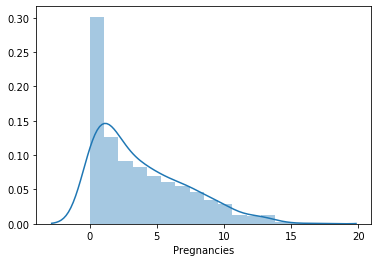

In [10]:
sns.distplot(df['Pregnancies'])

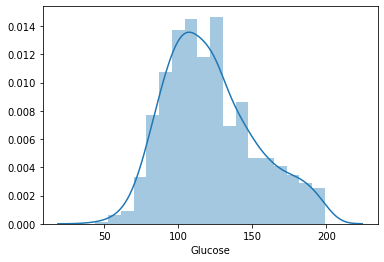

In [11]:
sns.distplot(df['Glucose'])

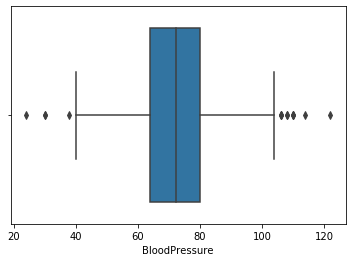

In [12]:
sns.boxplot(df['BloodPressure'])

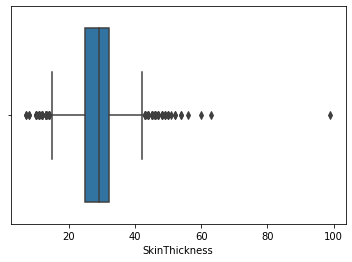

In [13]:
sns.boxplot(df['SkinThickness'])

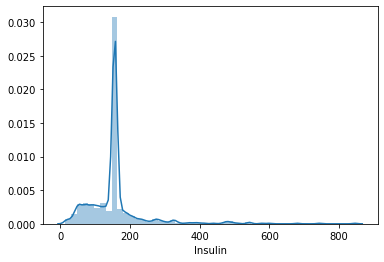

In [14]:
sns.distplot(df['Insulin'])

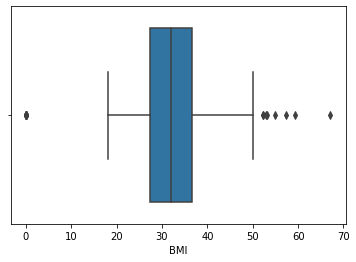

In [15]:
sns.boxplot(df['BMI'])

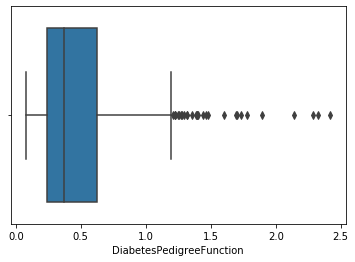

In [16]:
sns.boxplot(df['DiabetesPedigreeFunction'])

In [17]:
df['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

# Bi-Variate Analysis

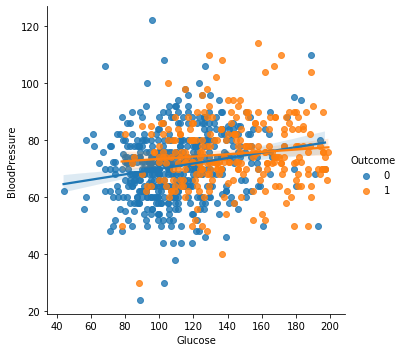

In [18]:
sns.lmplot(x='Glucose', y='BloodPressure', data=df, hue='Outcome')

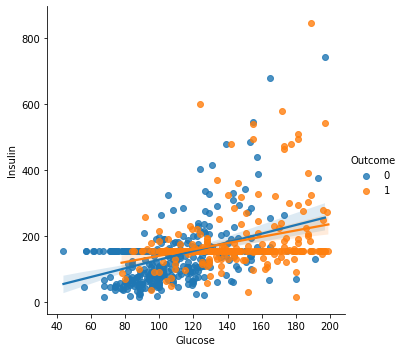

In [19]:
sns.lmplot(x='Glucose', y='Insulin', data=df, hue='Outcome')

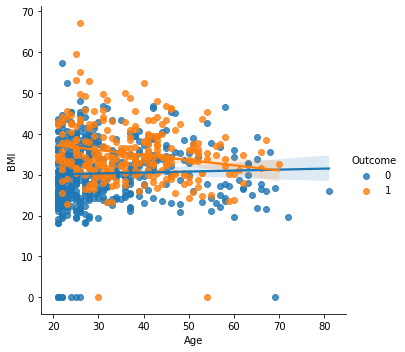

In [20]:
sns.lmplot(x='Age', y='BMI', data=df, hue='Outcome')

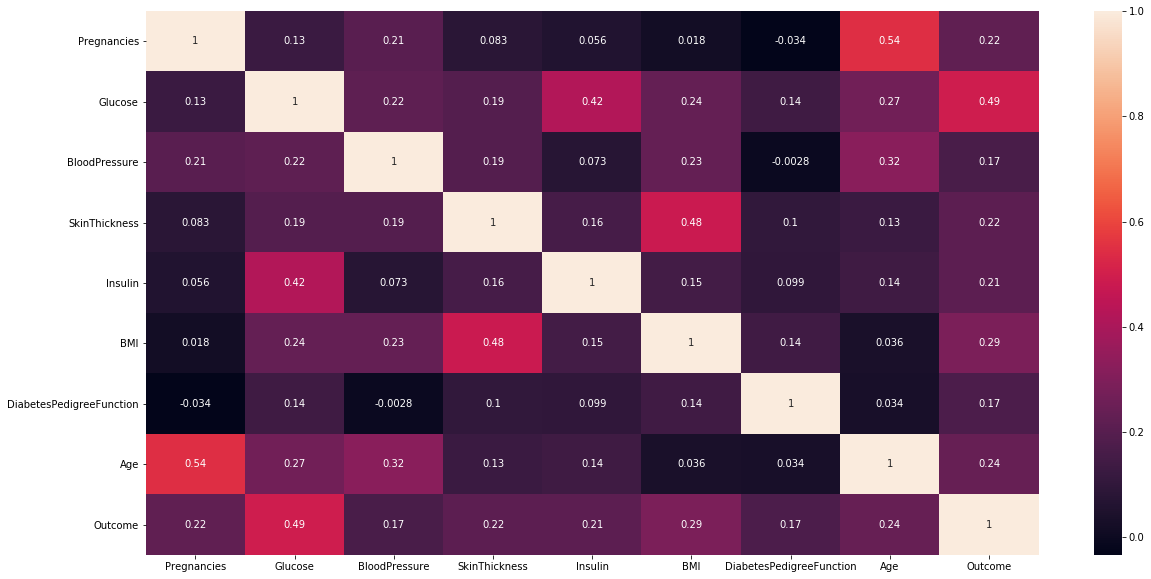

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [22]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

# Data Standardization

In [23]:
from sklearn import preprocessing

In [24]:
df_std= preprocessing.scale(df)
type(df_std)

numpy.ndarray

In [25]:
# converting it back to a data frame
df_std= pd.DataFrame(df_std)

In [26]:
df_std.head()

,0,1,2,3,4,5,6,7,8
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.409746,5.484909,-0.020496,1.365896


In [27]:
df_std.describe()

,0,1,2,3,4,5,6,7,8
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,-3.301757e-16,6.966722e-16,6.866252e-16,-2.352033e-16,2.295979e-16,2.398978e-16,1.857600e-16,2.408374e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.554131e+00,-4.004245e+00,-2.521670e+00,-1.665945e+00,-4.060474e+00,-1.189553e+00,-1.041549e+00,-7.321202e-01
25%,-8.448851e-01,-7.212214e-01,-6.953060e-01,-4.727737e-01,-4.007289e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01,-7.321202e-01
50%,-2.509521e-01,-1.540881e-01,-1.675912e-02,8.087936e-16,-3.345079e-16,9.419788e-04,-3.001282e-01,-3.608474e-01,-7.321202e-01
75%,6.399473e-01,6.103090e-01,6.282695e-01,3.240194e-01,-3.345079e-16,5.847705e-01,4.662269e-01,6.602056e-01,1.365896e+00
max,3.906578e+00,2.541850e+00,4.102655e+00,7.950467e+00,8.126238e+00,4.455807e+00,5.883565e+00,4.063716e+00,1.365896e+00


In [28]:
# replacing the last column with the outcome so that it will be binary variable
df_std[8]= df['Outcome']

# Train test Split

In [29]:
# taking independant variables into x and dependant variable to y
x= df_std.drop(columns=8)
y= df_std[8]

In [30]:
# splitting data for training and testing
from sklearn import model_selection
x_train ,x_test , y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.2)

# Building Multi Layer Perceptron

In [31]:
from keras.models import Sequential
model= Sequential()

In [32]:
# input layer to first hidden layer
from keras.layers import Dense, Activation
model.add(Dense(32, activation='relu', input_dim=8))

In [33]:
# first hidden layer to second hidden layer
model.add(Dense(16, activation='relu'))

In [34]:
# second layer to output layer
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [36]:
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [37]:
model.fit(x_train, y_train, epochs=250 )

Epoch 1/250
20/20 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.5831
Epoch 2/250
20/20 [==============================] - 0s 2ms/step - loss: 0.6250 - accuracy: 0.6775
Epoch 3/250
20/20 [==============================] - 0s 1ms/step - loss: 0.5805 - accuracy: 0.7345
Epoch 4/250
20/20 [==============================] - 0s 1ms/step - loss: 0.5433 - accuracy: 0.7541
Epoch 5/250
20/20 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.7590
Epoch 6/250
20/20 [==============================] - 0s 1ms/step - loss: 0.4956 - accuracy: 0.7638
Epoch 7/250
20/20 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.7720
Epoch 8/250
20/20 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7736
Epoch 9/250
20/20 [==============================] - 0s 1ms/step - loss: 0.4686 - accuracy: 0.7752
Epoch 10/250
20/20 [==============================] - 0s 1ms/step - loss: 0.4663 - accuracy: 0.7736
Epoch 11/

In [38]:
model.evaluate(x_train, y_train)

20/20 [==============================] - 0s 798us/step - loss: 0.2053 - accuracy: 0.9186


[0.2053017020225525, 0.9185667634010315]

In [39]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 998us/step - loss: 0.5504 - accuracy: 0.7597


[0.5504043102264404, 0.7597402334213257]

# Evaluation Metrics


In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
y_pred= model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [42]:
k=confusion_matrix(y_test, y_pred)

(Text(0.5, 15.0, 'Prediction'), Text(33.0, 0.5, 'Actual'))

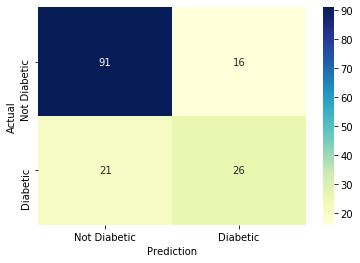

In [43]:
sns.heatmap(k, annot=True, xticklabels=['Not Diabetic', 'Diabetic'], 
            yticklabels=['Not Diabetic', 'Diabetic'], cmap='YlGnBu', )
plt.xlabel('Prediction'), plt.ylabel('Actual')

In [44]:
from sklearn.metrics import roc_curve

In [45]:
y_pred=model.predict(x_test)

In [46]:
fpr, tpr, _= roc_curve(y_test, y_pred)

(Text(0.5, 0, 'False positive rate'), Text(0, 0.5, 'True positive rate'))

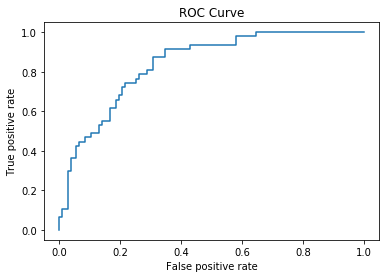

In [47]:
plt.title('ROC Curve')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate'), plt.ylabel('True positive rate')